<a href="https://colab.research.google.com/github/jrakhshanda/Machine-Learning-Projects/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creditcard Fraud Detection Using Decision Trees and Näive Bayes Classifiers**

The datasets contains transactions made by credit cards in September 2013
by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



















In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import tables
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importing Data and Quality Check**

In [5]:
data = pd.read_csv("creditcard.csv")
data.dropna(inplace = True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f4207a0b8>,
      dtype=object)

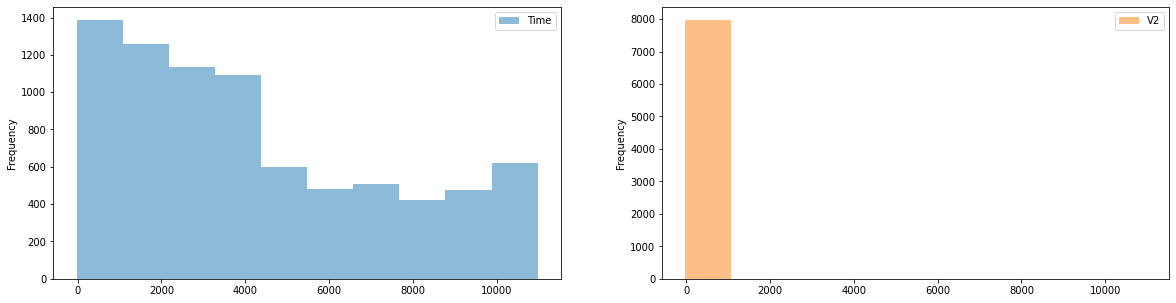

In [6]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
data.iloc[:,[0,2]].plot(kind='hist', subplots=True, ax=axes, alpha=0.5)

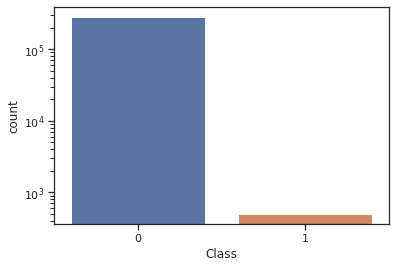

In [ ]:
sns.set(style="ticks")
ax=sns.countplot(x='Class',data=data);
ax.set_yscale('log')

**Correlation Matrix Of Features**

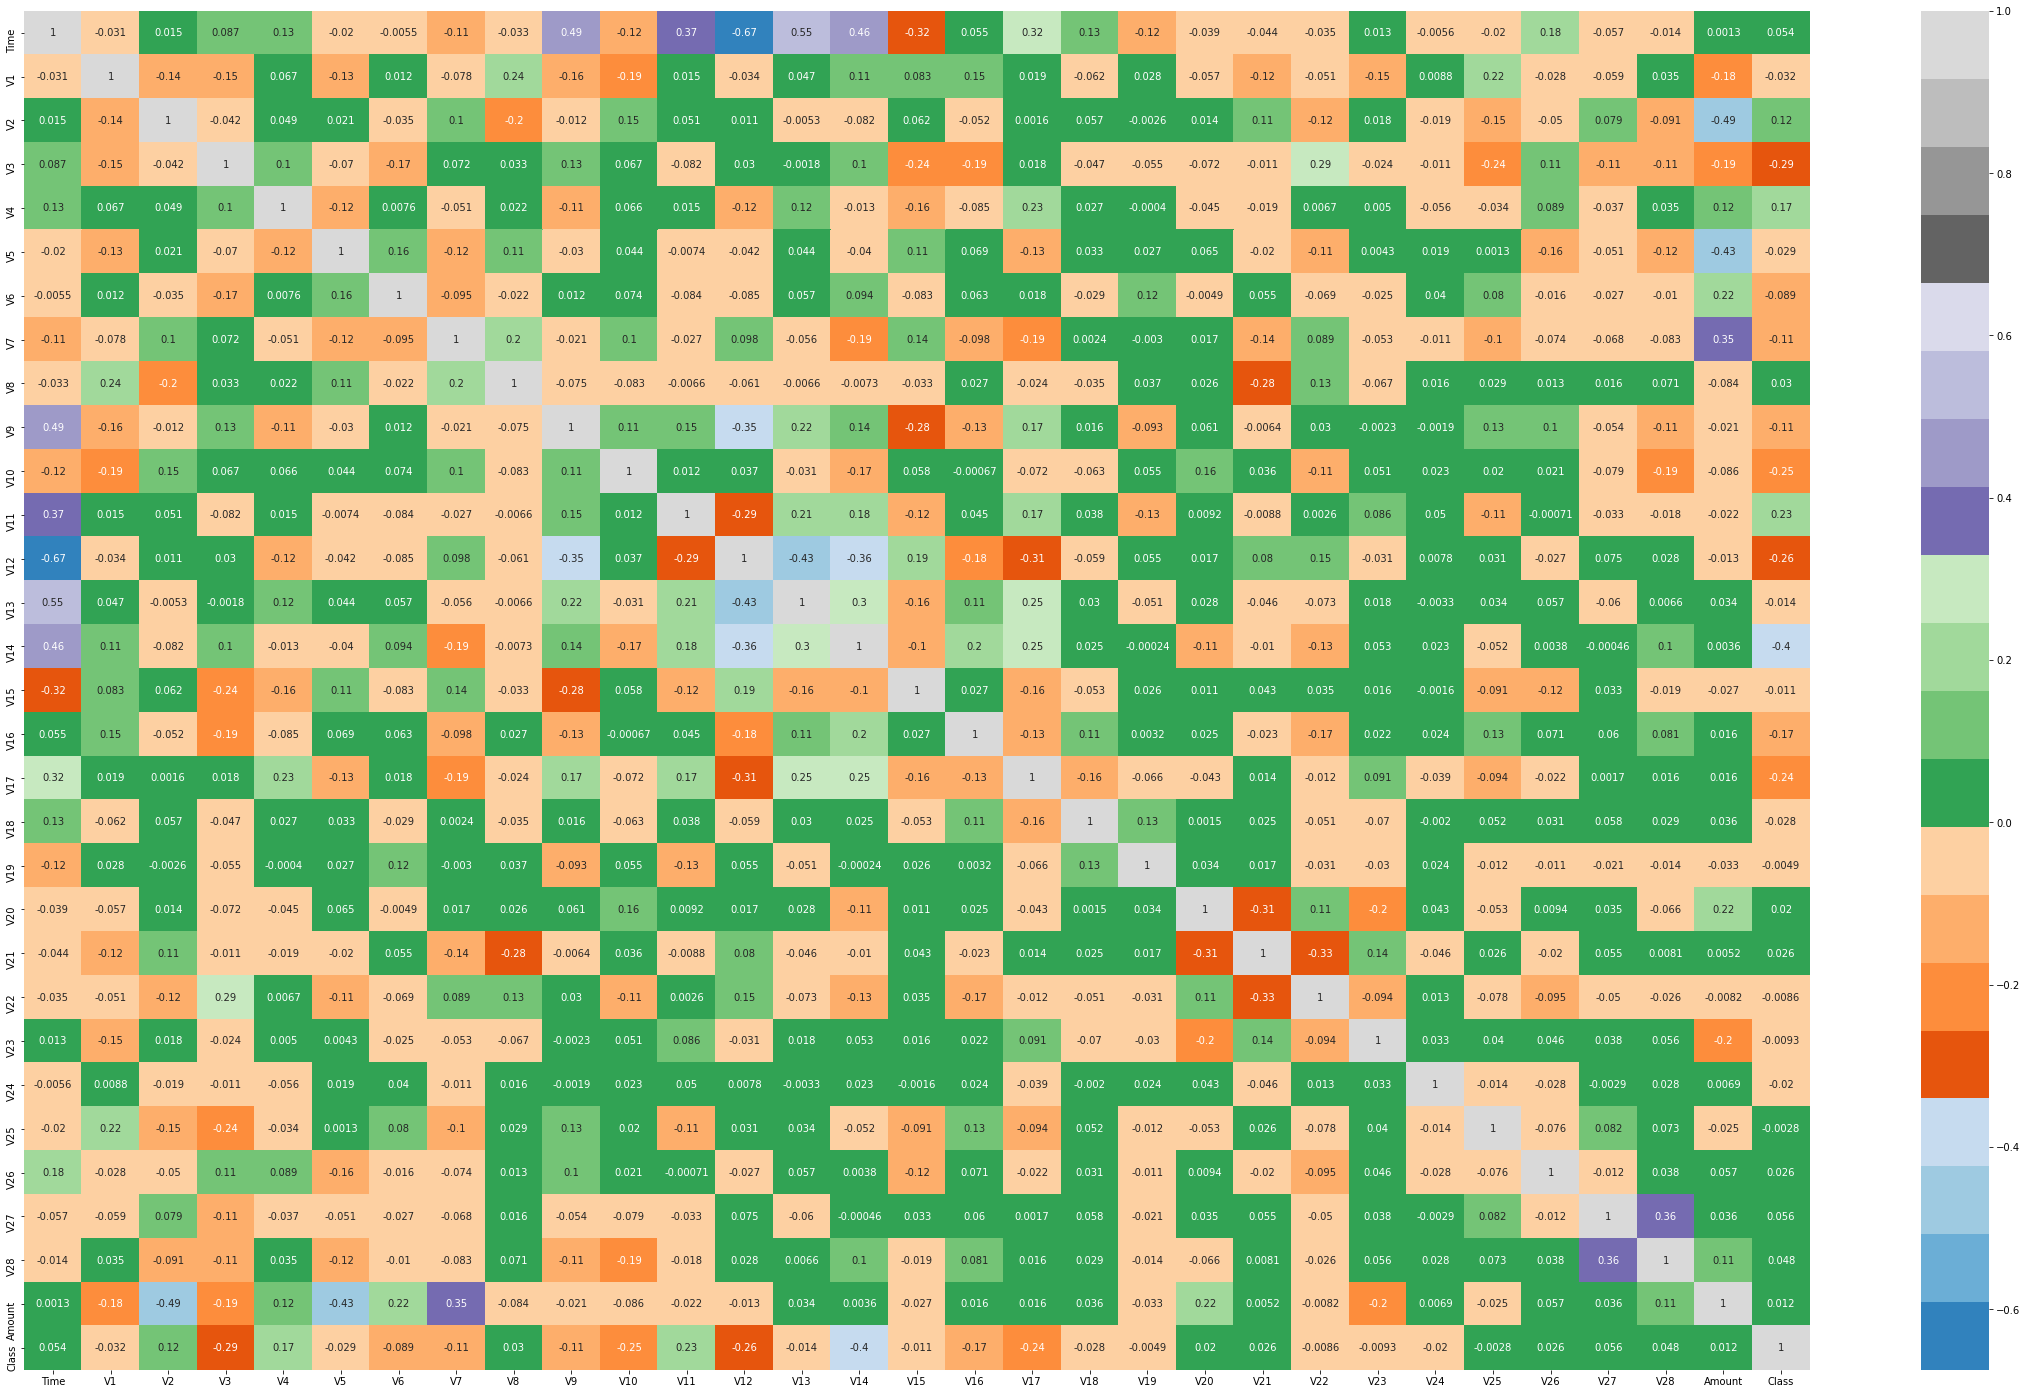

In [7]:
plt.figure(figsize = (40,25))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

The heatmap clearly shows which of the features aremulticollinear in nature. The plot also represents which of the features have high collinearity(positive or negative) with the target variable 'Class'. We can use this information to further reduce the dimensionality of our data. This will help us to reduce the complexity of learned model.

**Selecting Dependent and Independent Features**

In [9]:
y = data['Class'].astype('int')
X = data[data.columns[0:30]].astype('float')

**Splitting Data into Train and Test** 

We have divided data into two parts such that the traini data consists of 70% of the original data and testing part consists of the 30% of the data.
We are passing 3 parameters features, target, and test_set size in the function train_test_split().

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

**Buildind Decision Tree Model**

In this section we are creating a decision tree model using skikit-lear. We are classifying our data based on gini index impurities. we trained the model using gini index splitting method.

In [24]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = dtc.fit(X_train, y_train)

model.get_depth()

3

In [25]:
#Predict the response for train dataset
y_predTrain = dtc.predict(X_train)

**Confusion Matrix of Training dataset**

We are checking the performance of our model on training dataset by the means of misclassification rates of the data.

In [26]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix as cm
conf_matTrain = cm(y_train, y_predTrain)
print(conf_matTrain)

[[5560    0]
 [   0   20]]


In [27]:
print(metrics.classification_report(y_train,y_predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5560
           1       1.00      1.00      1.00        20

    accuracy                           1.00      5580
   macro avg       1.00      1.00      1.00      5580
weighted avg       1.00      1.00      1.00      5580



We can see from the above results that precision of our model on training data is 1 this means that we have zero missclassification errors on training data. Now we will check our trained model on testing data.

**Model Evaluation**

Let's estimate, how accurately the classifier or model can predict the type of cultivars.



In [28]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)

**Confusion Matrix of Test Data**

In [29]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[2387    0]
 [   1    4]]


In [36]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2387
           1       1.00      0.80      0.89         5

    accuracy                           1.00      2392
   macro avg       1.00      0.90      0.94      2392
weighted avg       1.00      1.00      1.00      2392



**Visualizing Decision Trees**

We are Scikit-learn's export_graphviz function for display the tree. For plotting tree.

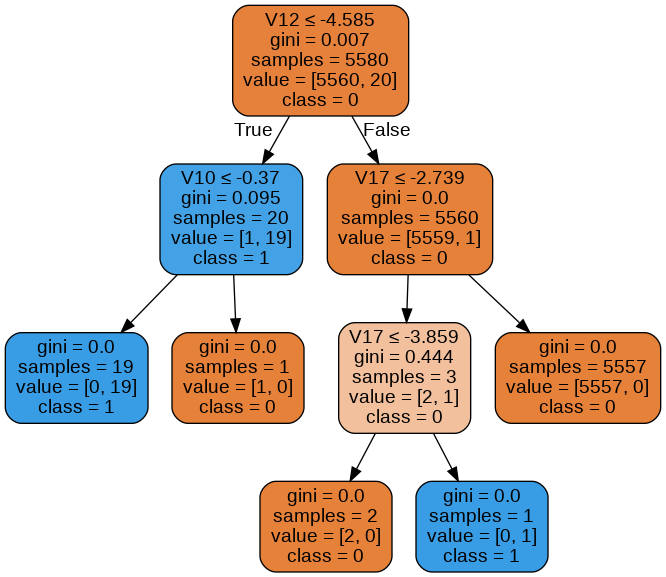

In [47]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = data.columns[0:30]
dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fraud.png')
Image(graph.create_png())

**Optimization of Decision Tree Performance**
